# Chapter 3 Problems - R

In [1]:
#### Sytem may require the following: 
# sudo apt install libcurl4-openssl-dev
# sudo apt install libxml2-dev

#### Only need to run the folloing installs once
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", "AICcmodavg"))

## Load Libraries

In [1]:
suppressMessages(library(readxl))
suppressMessages(library(ggplot2))
suppressMessages(library(ggpubr))
suppressMessages(library(tidyverse))
suppressMessages(library(broom))
suppressMessages(library(AICcmodavg))

## 3.1

In [2]:
Football.DataTable <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B1.XLS')

Football.df <- data.frame(
    OppRush=Football.DataTable$'x8', 
    PassYRDs=Football.DataTable$'x2',
    PercRushPlays=Football.DataTable$'x7',
    GamesWon=Football.DataTable$'y'
)

head(Football.df)

,OppRush,PassYRDs,PercRushPlays,GamesWon
,<dbl>,<dbl>,<dbl>,<dbl>
1,2205,1985,59.7,10
2,2096,2855,55.0,11
3,1847,1737,65.6,11
4,1903,2905,61.4,13
5,1457,1666,66.1,10
6,1848,2927,61.0,11


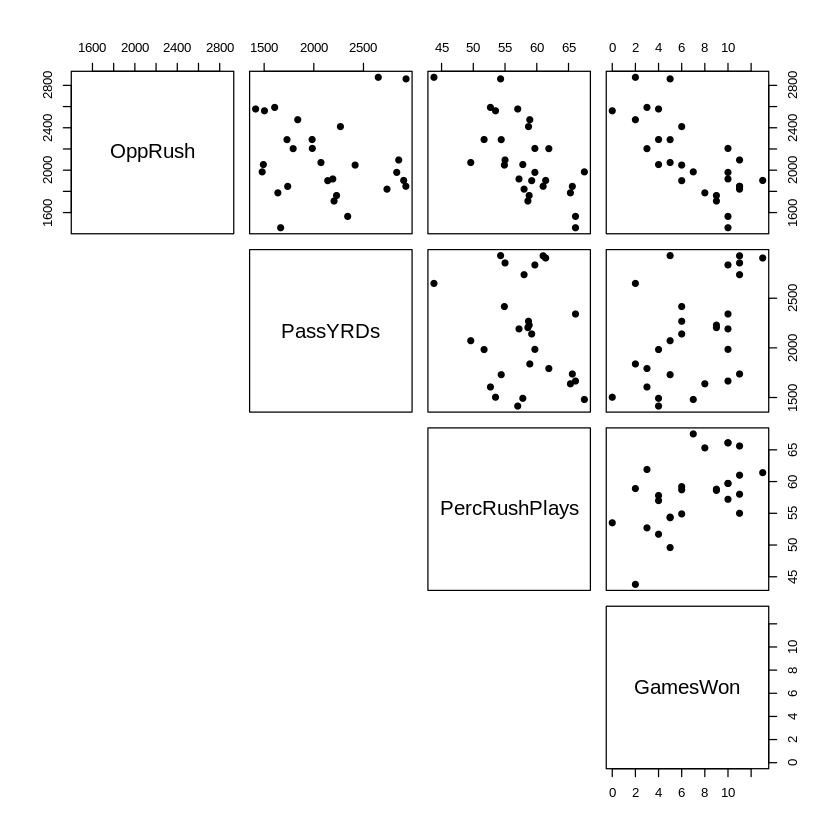

In [32]:
pairs(Football.df[,1:4], pch=19, lower.panel = NULL)

### a

In [5]:
Football.lm <- lm(GamesWon ~ PassYRDs + PercRushPlays + OppRush, data=Football.df)
Football.lm.summary <- summary(Football.lm)
Football.lm.anova <- anova(Football.lm)
Football.lm.MSres <- Football.lm.anova['Residuals','Mean Sq']
Football.lm.rsquared <- Football.lm.summary$r.squared
print(Football.lm.summary$coefficients)

                  Estimate   Std. Error   t value     Pr(>|t|)
(Intercept)   -1.808372059 7.9008594002 -0.228883 8.208990e-01
PassYRDs       0.003598070 0.0006949986  5.177090 2.655723e-05
PercRushPlays  0.193960210 0.0882334488  2.198262 3.781516e-02
OppRush       -0.004815494 0.0012769683 -3.771036 9.377699e-04


### b

In [6]:
Football.lm.rsquared

[1] 0.7863069

In [7]:
Football.lm.anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PassYRDs,1,76.19340,76.19340,26.17205,3.100132e-05
PercRushPlays,1,139.50082,139.50082,47.91784,3.697874e-07
OppRush,1,41.40006,41.40006,14.22072,9.377699e-04
Residuals,24,69.87000,2.91125,NA,NA


In [30]:
# The Sum of Squares for the regression
Football.lm.SSr <- sum(Football.lm.anova[,'Sum Sq']) - Football.lm.anova['Residuals','Sum Sq']
print(Football.lm.SSr)

[1] 257.0943


In [29]:
Football.lm.summary


Call:
lm(formula = GamesWon ~ PassYRDs + PercRushPlays + OppRush, data = Football.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0370 -0.7129 -0.2043  1.1101  3.7049 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.808372   7.900859  -0.229 0.820899    
PassYRDs       0.003598   0.000695   5.177 2.66e-05 ***
PercRushPlays  0.193960   0.088233   2.198 0.037815 *  
OppRush       -0.004816   0.001277  -3.771 0.000938 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.706 on 24 degrees of freedom
Multiple R-squared:  0.7863,	Adjusted R-squared:  0.7596 
F-statistic: 29.44 on 3 and 24 DF,  p-value: 3.273e-08


### c

In [14]:
Football.lm.summary$coefficients[,c(3,4)]

,t value,Pr(>|t|)
(Intercept),-0.228883,8.208990e-01
PassYRDs,5.177090,2.655723e-05
PercRushPlays,2.198262,3.781516e-02
OppRush,-3.771036,9.377699e-04


Passing Yards, Percentage Rushing Plays and Opponent rushing yards are related to Games Won. It appears as the Percentage Rushing Plays is the weakest indicator of the three.

### d

In [16]:
Football.lm.rsquared

[1] 0.7863069

In [19]:
Football.lm.summary$adj.r.squared

[1] 0.7595953

### e

In [22]:
# Create a reduced model removing PercRushPlays
Football.lm.Reduced <- lm(GamesWon ~ PassYRDs + OppRush, data=Football.df)
Football.lm.Reduced.summary <- summary(Football.lm.Reduced)
Football.lm.Reduced.anova <- anova(Football.lm.Reduced)
Football.lm.Reduced.MSres <- Football.lm.Reduced.anova['Residuals','Mean Sq']
Football.lm.Reduced.rsquared <- Football.lm.Reduced.summary$r.squared
print(Football.lm.Reduced.summary$coefficients)

                Estimate   Std. Error   t value     Pr(>|t|)
(Intercept) 14.712674988 2.6175265761  5.620831 7.549064e-06
PassYRDs     0.003111132 0.0007074454  4.397699 1.775241e-04
OppRush     -0.006808275 0.0009658426 -7.049053 2.177139e-07


In [23]:
Football.lm.Reduced.rsquared

[1] 0.7432802

In [24]:
Football.lm.Reduced.anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PassYRDs,1,76.1934,76.193400,22.69330,6.872982e-05
OppRush,1,166.8327,166.832689,49.68914,2.177139e-07
Residuals,25,83.9382,3.357528,NA,NA


In [31]:
# The Sum of Squares for the regression
Football.lm.Reduced.SSr <- sum(Football.lm.Reduced.anova[,'Sum Sq']) - 
    Football.lm.Reduced.anova['Residuals','Sum Sq']
print(Football.lm.Reduced.SSr)

[1] 243.0261


In [46]:
# The t-value of 2.19, found in the summary of the Linear Model, when squared equals: 4.832354
tvalueSquared <- Football.lm.summary$coefficients['PercRushPlays','t value']^2
print(tvalueSquared)

# When we run both the "full" model, and the "Reduced" model without the PercRushPlays
#   we can find the different between Sum of Squares Regression term and divide by 
#   the Mean Square Residuals from the full model
SSrModelComp <- (Football.lm.SSr - Football.lm.Reduced.SSr) / Football.lm.anova['Residuals','Mean Sq']
print(SSrModelComp)

# Note that there is a very small difference in these terms due to rounding and representation,
#   as such they faile the "identical" check, but they are equal
SSrModelComp - tvalueSquared
#identical(SSrModelComp, tvalueSquared)
all.equal(SSrModelComp, tvalueSquared)

[1] 4.832354
[1] 4.832354


[1] -1.332268e-14

[1] TRUE

## 3.2

In [53]:
Football.lm.predictedCor <- cor(unname(predict(Football.lm)),Football.df$GamesWon)

In [60]:
# Small variation in values so they fail the "identical" test, but they are equal
Football.lm.predictedCor^2 - Football.lm.rsquared
all.equal(Football.lm.predictedCor^2,Football.lm.rsquared)
identical(Football.lm.predictedCor^2,Football.lm.rsquared)


[1] -1.110223e-16

[1] TRUE

[1] FALSE

## 3.3

### a

In [70]:
confint(Football.lm, level=0.95)['PercRushPlays',]

2.5 %     97.5 % 
0.01185532 0.37606510

In [109]:
#Manually
beta_j <- Football.lm.summary$coefficients['PercRushPlays','Estimate']
print(beta_j)
t_alpha <- qt(.975, df=(nrow(Football.df)-4))
print(t_alpha)
variance <- Football.lm.anova['Residual','Mean Sq']
print(variance)

[1] 0.1939602
[1] 2.063899
[1] 2.91125


In [110]:
nrow(Football.df)

[1] 28

In [111]:
Xdf <- subset(Football.df, select = -c(GamesWon))

In [112]:
XMatrix <- as.matrix(cbind(1,Xdf))

In [113]:
C_jj <- solve(t(XMatrix) %*% XMatrix)[4,4]

In [114]:
beta_j + t_alpha * sqrt(variance * C_jj)

[1] 0.3760651

In [115]:
beta_j - t_alpha * sqrt(variance * C_jj)

[1] 0.01185532

In [91]:
Football.lm.summary$coefficients['PercRushPlays','Estimate']

[1] 0.1939602

### b

In [67]:
predict(Football.lm, 
        data.frame(PassYRDs=c(2300), PercRushPlays=c(56.0), OppRush=c(2100)),
        interval='confidence', 
        level=0.95)

,fit,lwr,upr
1,7.216424,6.436203,7.996645


In [ ]:
#Mannually
